In [ ]:

# Высокая цель: уменшить размерность векторного представления слов текстуальных данных.Построить граифики уменьшения размерности. 
    
# 1. Загрузка текстового файла из корневого каталога. +
# 2. Обработка текстовых данных. +
# 3. Понижение размерности текстовых данных.
# 4. Построить график объема информации. 

# Дедлайн 15.01

In [39]:
import pandas as pd 
import numpy as np 
import spacy 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS # импорт библиотек
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!python -m spacy download en_core_web_lg

^C


In [13]:
nlp = spacy.load("en_core_web_lg") # создание обьекта nlp

     ------------------------------------ 587.7/587.7 MB 646.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


You should consider upgrading via the 'C:\Users\kaspe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [17]:
def get_array_with_text(filename): # функция которая принимает на вход имя файла, извлекает из него слова
    with open(filename, 'r') as file:
        text = file.read() # открыли файл с текстом и записали в переменную 
    
    new_t = nlp(text)

    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    marks = string.punctuation

    text_lemm = [word.lemma_.lower().strip() if 
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in new_t]
    
    text_clear = [word for word in text_lemm if 
                  word not in stop_words and 
                  word not in marks]
    
    return text_clear


In [20]:
text = get_array_with_text("text.txt") # получаем массив слов

In [27]:
def get_array_vectors(text_list):
    # данная функция принимает наш текст и преобразует в вектор
    array = []

    for i in text_list:
        array.append(nlp(i).vector)

    return array

In [33]:
vectorized_text = get_array_vectors(text) # векторизировали слова 

In [32]:
pca_model = PCA(n_components=2) # создали модель pca

In [35]:
prepared_words = pca_model.fit_transform(vectorized_text) # снизили размерность

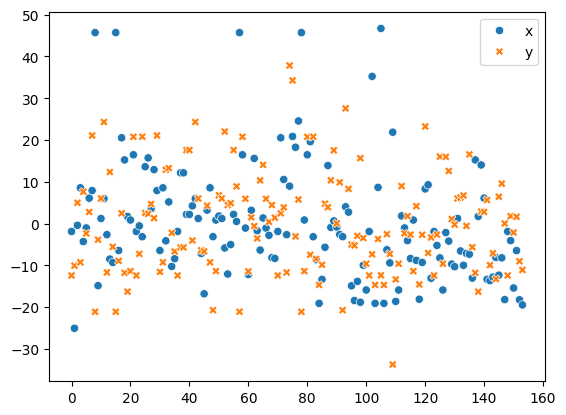

In [45]:
df = pd.DataFrame(prepared_words, columns=['x', 'y']) # для удобства создал дата фрейм

sns.scatterplot(data=df)

plt.show()


In [1]:
df

NameError: name 'df' is not defined